In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import graphviz
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
df_train = pd.read_csv('train_data.csv', sep=',')
df_test = pd.read_csv('test_data.csv', sep=',')


In [3]:
#Create variable feature length to later input into decision tree. 
featurelist = []
for lines in df_train:
    featurelist.append(lines)

featurelist = featurelist[1:-2]

In [4]:
train_data = df_train.values
test_data = df_test.values

train_features = train_data[:, 1:-2] # only keep the continuous features
train_labels = list(train_data[:, -1])
test_features = test_data[:, 1:-1] # only keep the continuous features

# preprocessing
# You can try any preprocessing approaches
imp = SimpleImputer(missing_values=np.nan, strategy='mean') # impute the data with mean value
imp.fit(train_features)
imp.fit(test_features)
SimpleImputer()
imputed_train_features = imp.transform(train_features)
imputed_test_features = imp.transform(test_features)

In [5]:
X = imputed_train_features
Y = train_labels

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.20, random_state = 100)

In [7]:
clf1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 100,
                               max_depth=7, min_samples_leaf=1)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [8]:
dot_data1= tree.export_graphviz(clf1, out_file=None, feature_names=(featurelist))

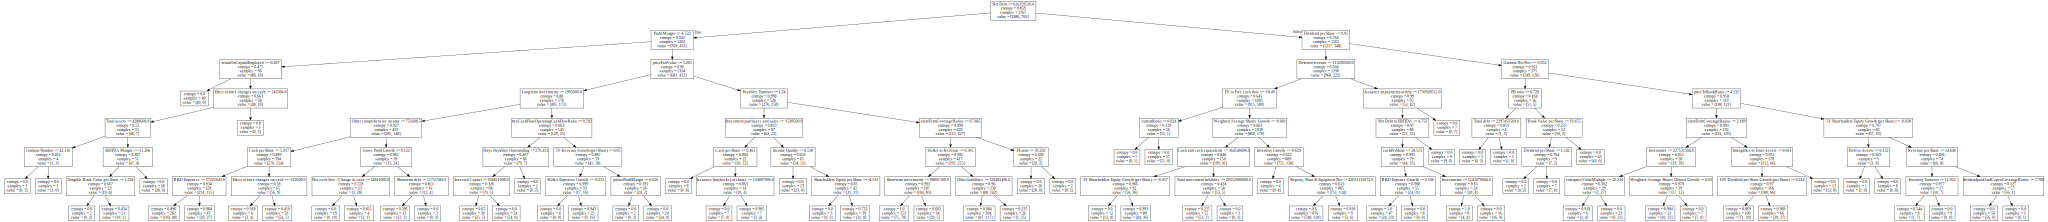

In [9]:
graph = graphviz.Source(dot_data1)
graph

In [10]:
prediction_training1=clf1.predict(X_train)

In [11]:
print(metrics.classification_report(y_train, prediction_training1))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1986
           1       0.65      0.57      0.61       781

   micro avg       0.79      0.79      0.79      2767
   macro avg       0.74      0.72      0.73      2767
weighted avg       0.78      0.79      0.79      2767



In [12]:
metrics.confusion_matrix(y_train, prediction_training1)

array([[1744,  242],
       [ 337,  444]])

In [13]:
prediction_testing1 = clf1.predict(X_test)

In [14]:

print(metrics.classification_report(y_test, prediction_testing1))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       512
           1       0.41      0.42      0.42       180

   micro avg       0.70      0.70      0.70       692
   macro avg       0.60      0.60      0.60       692
weighted avg       0.70      0.70      0.70       692



In [15]:
metrics.confusion_matrix(y_test, prediction_testing1)

array([[406, 106],
       [105,  75]])

In [16]:
test_data_prediction = clf1.predict(imputed_test_features)

In [17]:
df_sub = pd.read_csv('sampleSubmission.csv', sep=',')
df_sub['Class'] = test_data_prediction
df_sub.to_csv ('my_final_submission6_7.csv', index = False, header=True)
print('done!')

done!
